In [1]:
#importing the libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the dataset
df = pd.read_csv('Cellphone.csv')

In [4]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [20]:
#checking the datatypes of the columns
df.dtypes

Product_id        int64
Price             int64
Sale              int64
weight          float64
resoloution     float64
ppi               int64
cpu core          int64
cpu freq        float64
internal mem    float64
ram             float64
RearCam         float64
Front_Cam       float64
battery           int64
thickness       float64
dtype: object

In [5]:
#the target column is price
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [6]:
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

Hence there are no null values

In [7]:
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [10]:
df.duplicated().sum()

0

#### Data Visualization

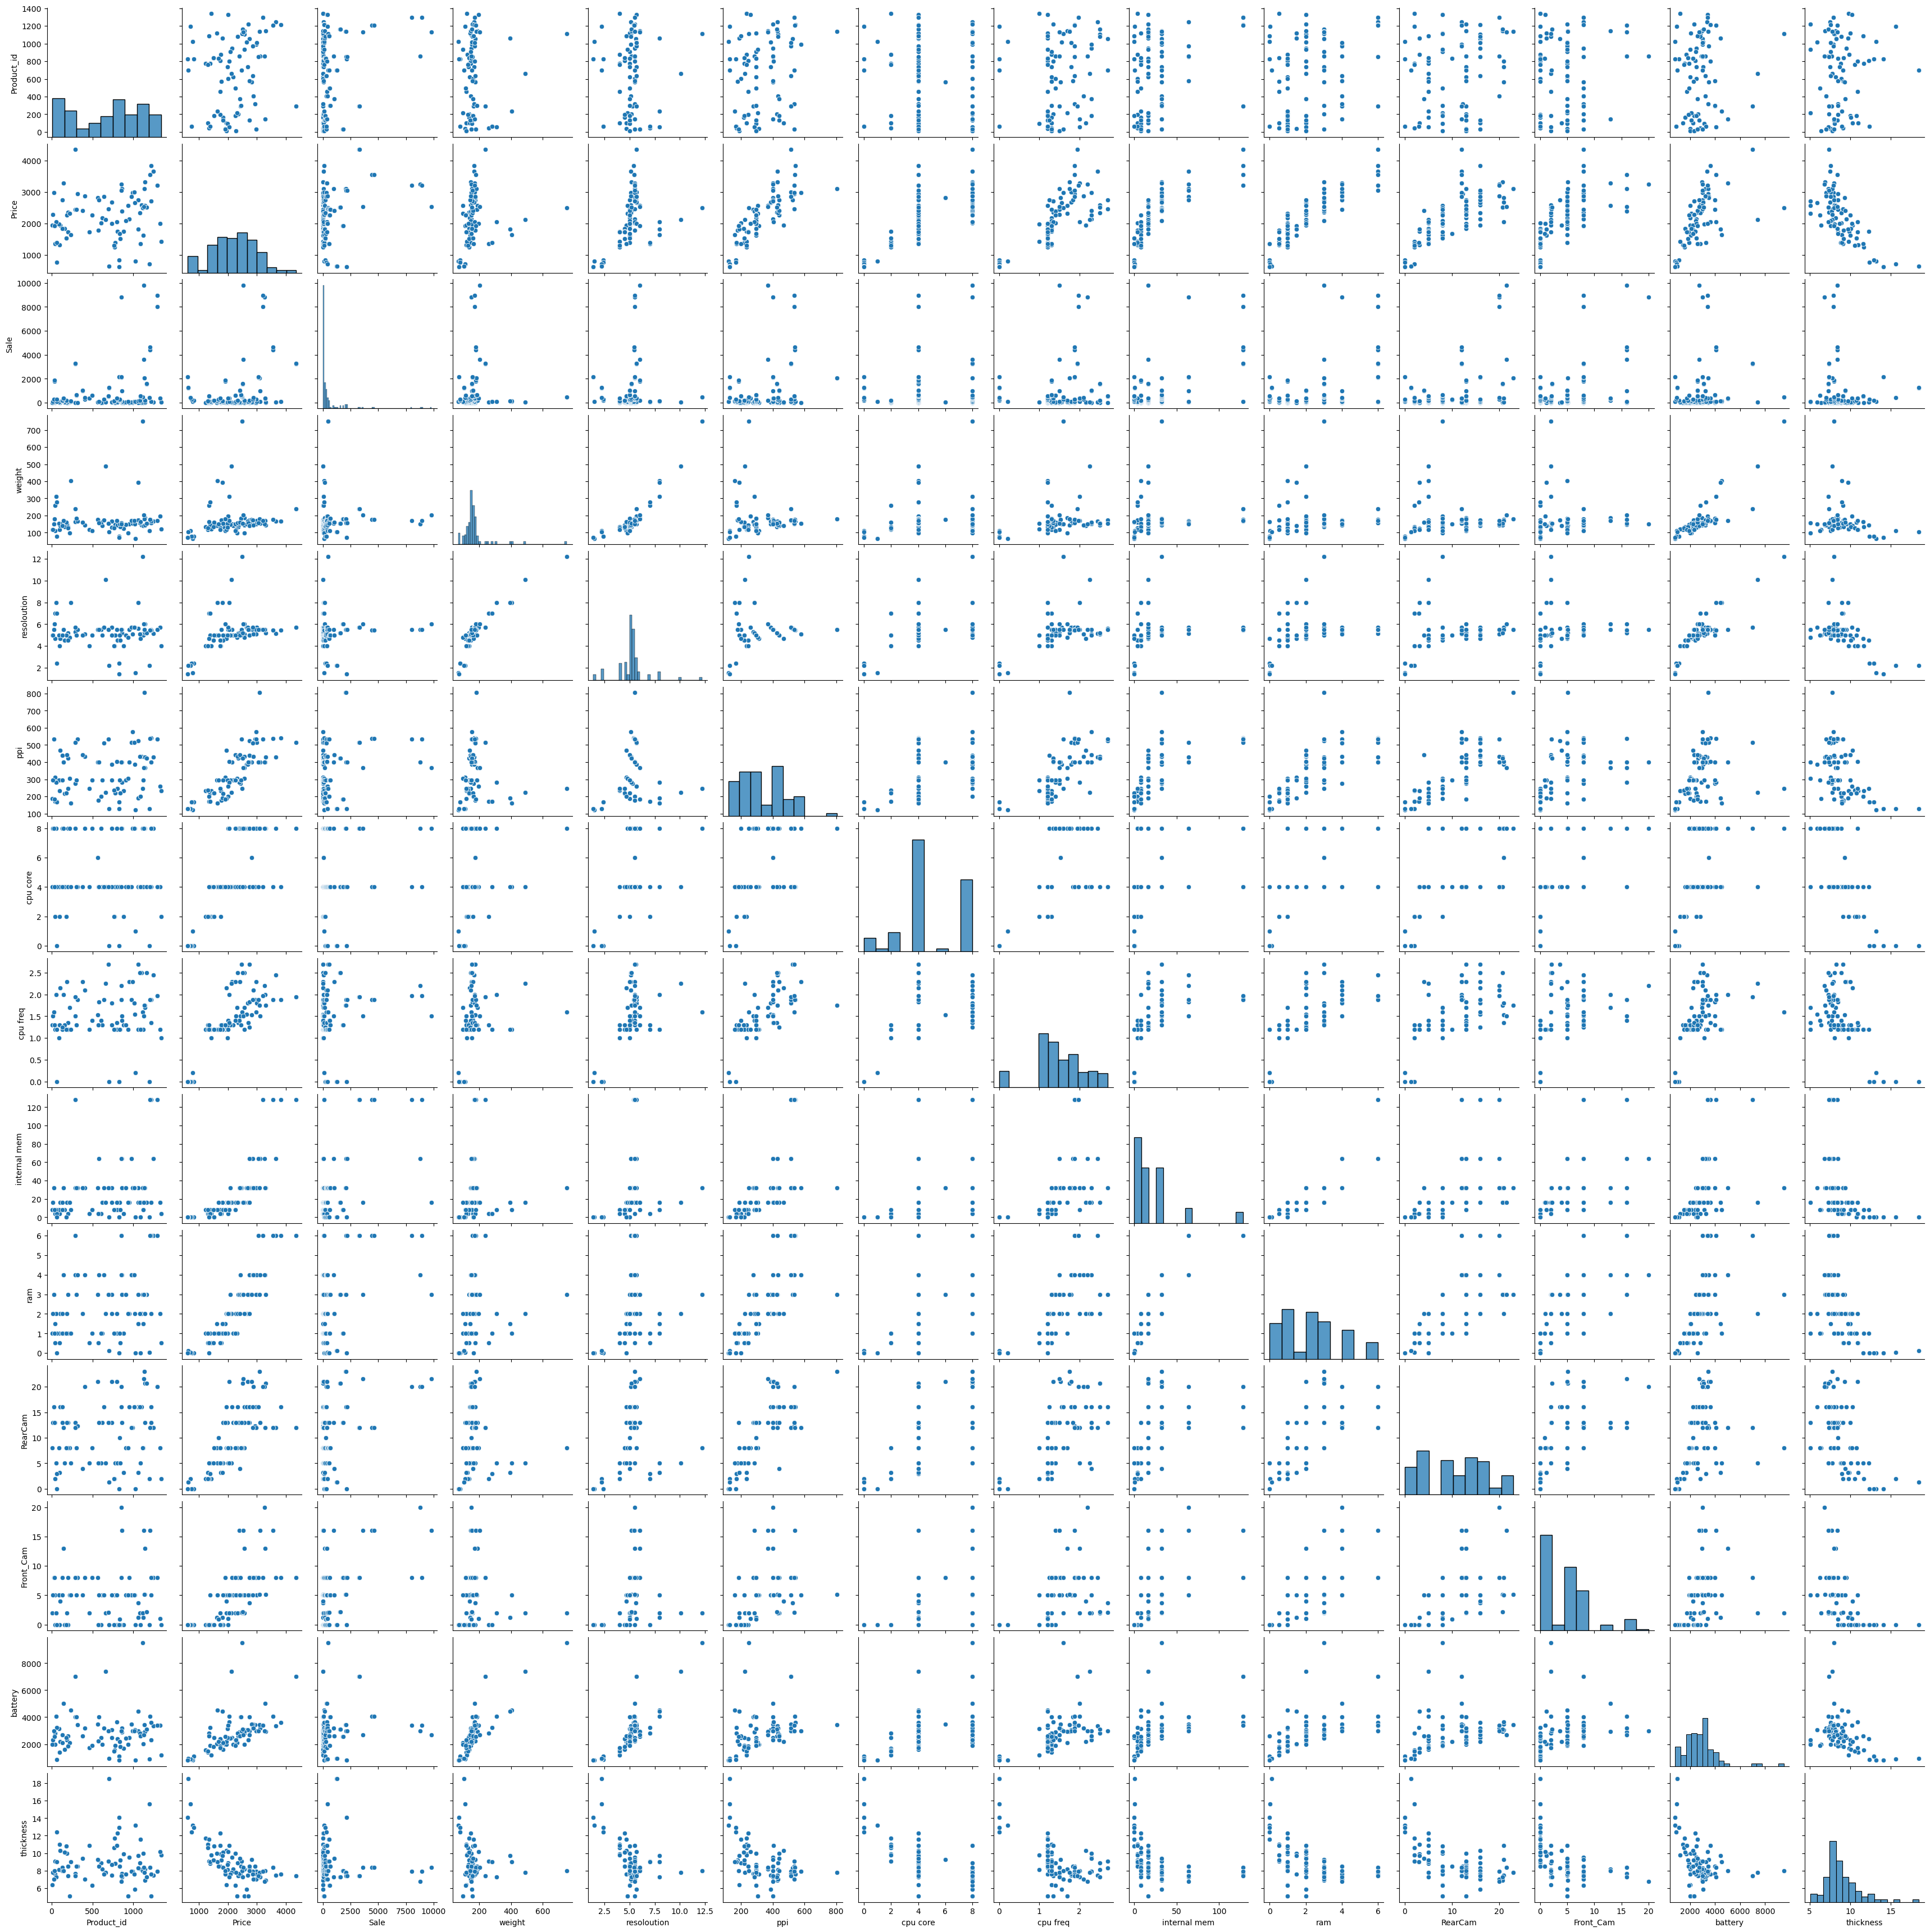

In [11]:
sns.pairplot(df)

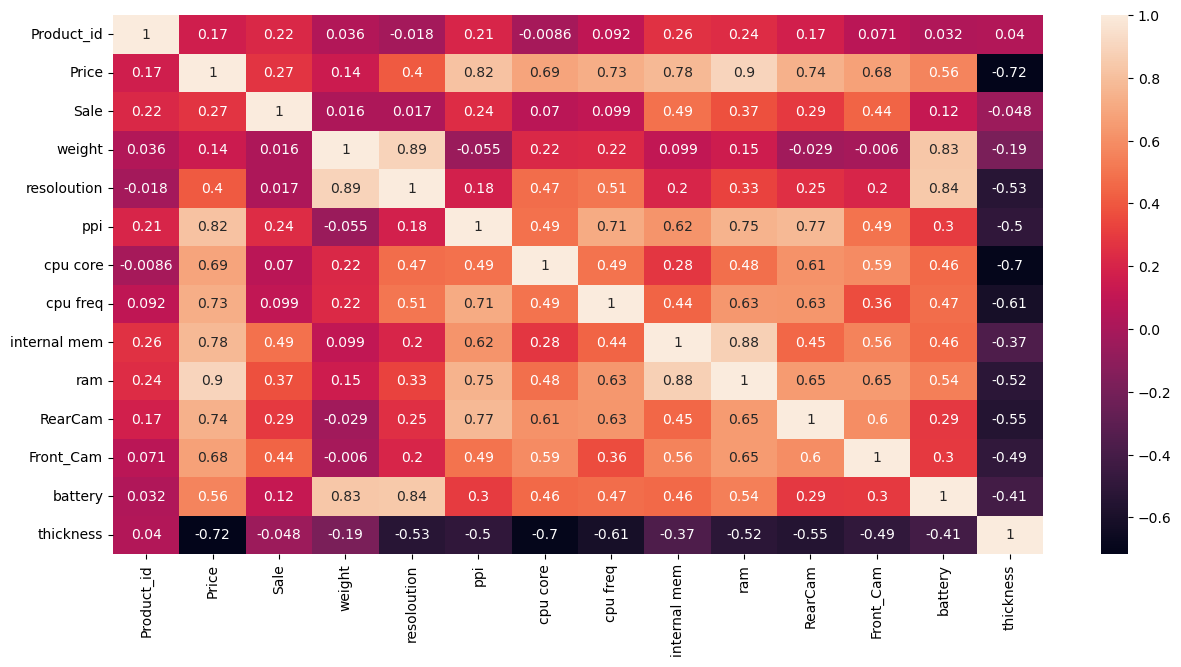

In [66]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

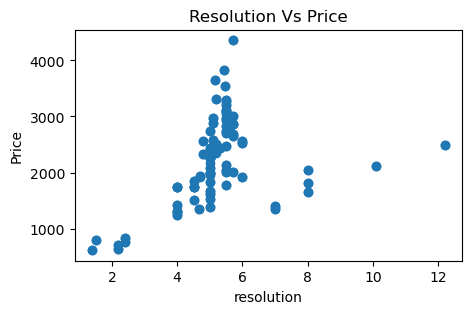

In [75]:
#Resolution vs Price SCATTERPLOT
fig, ax = plt.subplots(figsize=(5,3))
ax.scatter(df['resoloution'], df['Price'])
ax.set(title='Resolution Vs Price', xlabel='resolution', ylabel='Price')
plt.show()

array([[<AxesSubplot: title={'center': 'ram'}>,
        <AxesSubplot: title={'center': 'cpu core'}>],
       [<AxesSubplot: title={'center': 'cpu freq'}>,
        <AxesSubplot: title={'center': 'internal mem'}>]], dtype=object)

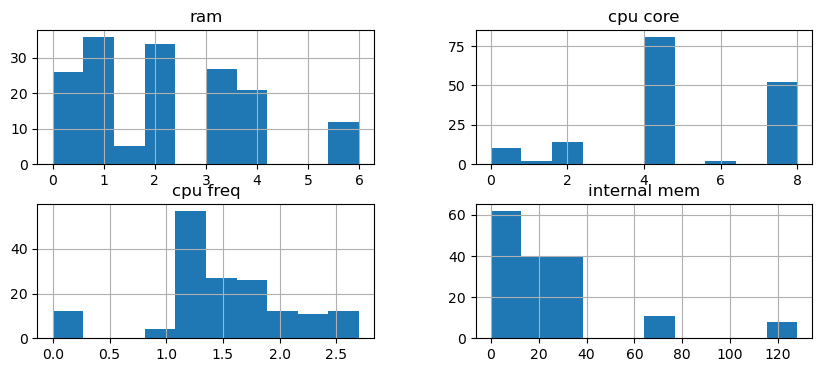

In [78]:
#HISTOGRAM
features=['ram', 'cpu core', 'cpu freq', 'internal mem']
df[features].hist(figsize=(10, 4))

<AxesSubplot: xlabel='Front_Cam', ylabel='Price'>

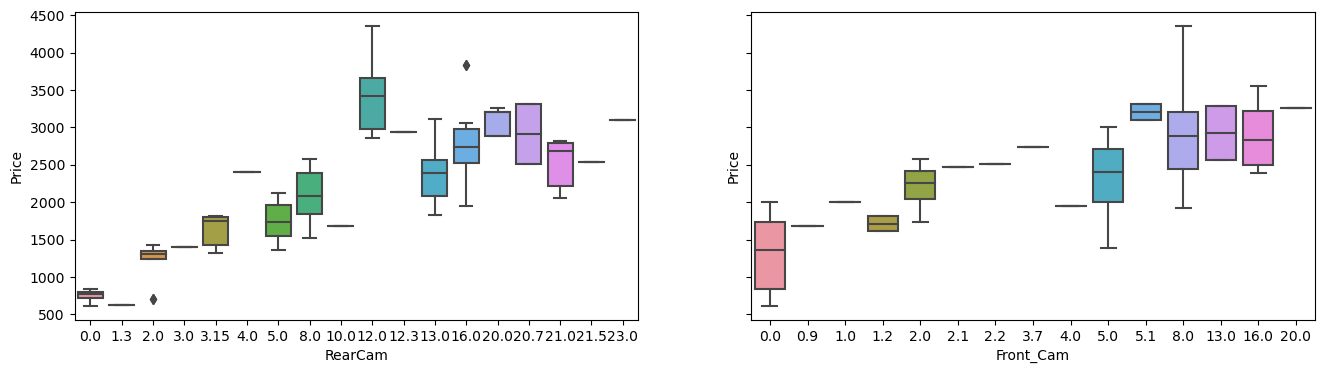

In [88]:
#Boxplots
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

# box plot illustration
sns.boxplot(x='RearCam', y='Price', data=df, ax=axes[0])
sns.boxplot(x='Front_Cam', y='Price', data=df, ax=axes[1])


In [12]:
#Creating X and y
X = df.drop('Price', axis=1)
y = df['Price']

In [13]:
X

,Product_id,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [14]:
y

0      2357
1      1749
2      1916
3      1315
4      1749
       ... 
156    3551
157    3211
158    3260
159    3211
160    2536
Name: Price, Length: 161, dtype: int64

In [21]:
#Splitting dataset into training & test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
X_train

,Product_id,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
115,637,309,174.0,5.7,513,4,1.875,32.0,4.0,16.0,5.0,3200,7.6
2,40,10,110.0,4.7,312,4,1.200,8.0,1.5,13.0,5.0,2000,7.6
123,1327,399,194.8,5.7,258,4,1.200,16.0,2.0,8.0,1.0,3400,10.2
45,739,40,131.0,5.0,294,4,1.300,16.0,2.0,13.0,5.0,2500,8.7
42,162,38,133.5,4.5,218,4,1.300,8.0,1.0,5.0,0.0,1600,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,14,91,116.0,5.0,294,8,1.500,16.0,2.0,13.0,5.0,2300,7.8
106,133,214,142.0,5.0,440,8,1.250,16.0,2.0,16.0,8.0,2700,8.0
14,1103,16,145.0,5.1,432,4,2.500,16.0,2.0,16.0,2.0,2800,8.1
92,131,156,154.0,5.0,294,4,1.200,8.0,1.0,13.0,5.0,2100,8.4


In [23]:
y_train

115    2858
2      1916
123    2001
45     1989
42     1843
       ... 
71     2276
106    2744
14     2580
92     1831
102    1522
Name: Price, Length: 128, dtype: int64

In [24]:
X_test

,Product_id,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
105,827,213,78.4,2.40,166,0,0.000,0.0,0.008,0.0,0.0,1100,12.9
108,832,268,150.0,5.00,294,4,1.200,16.0,1.000,10.0,0.9,2200,8.5
142,1161,1530,152.0,5.20,424,4,2.500,16.0,3.000,20.7,2.2,3100,7.3
55,575,45,174.0,5.50,178,4,1.300,4.0,0.512,5.0,0.0,2250,9.2
94,841,164,134.0,4.50,221,4,1.200,8.0,0.512,5.0,0.0,1830,9.2
29,10,26,118.0,5.00,187,4,1.300,8.0,1.000,8.0,2.0,2000,6.4
101,827,201,78.4,2.40,166,0,0.000,0.0,0.008,0.0,0.0,1100,12.9
51,43,43,260.0,7.00,170,2,1.300,4.0,0.512,2.0,0.0,2820,9.1
100,1080,198,158.0,5.10,432,4,2.500,16.0,2.000,16.0,2.0,2800,8.9
143,1161,1584,152.0,5.20,424,4,2.500,16.0,3.000,20.7,2.2,3100,7.3


In [25]:
y_test

105     833
108    1676
142    2508
55     1777
94     1511
29     1950
101     833
51     1347
100    2343
143    2508
19     1238
84     1646
15     1612
66     2746
24     1942
30     2258
128    2491
148    3055
98     1522
16     2258
75     2276
18     1612
12     2174
9      2580
31     2977
152    4361
97     2562
56     3658
132    2466
104    2744
137    3116
78     2714
60     2824
Name: Price, dtype: int64

In [26]:
X_train.shape, y_train.shape

((128, 13), (128,))

In [27]:
X_test.shape, y_test.shape

((33, 13), (33,))

### Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
acc_rfr = rfr.score(X_test, y_test)*100
print('Accuracy:', acc_rfr)

Accuracy: 96.10967164756417


### Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
acc_lr = lr.score(X_test,y_test)*100
print('Accuracy:', acc_lr)

Accuracy: 95.93179111625733


### Ridge Regression

In [48]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train, y_train)

Ridge()

In [60]:
acc_rid = rid.score(X_test, y_test)*100
print('Accuracy:', acc_rid)

Accuracy: 95.92380997766499


### Lasso Regression

In [50]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train, y_train)

Lasso()

In [61]:
acc_las = las.score(X_test, y_test)*100
print('Accuracy:', acc_las)

Accuracy: 95.88050276425598


In [62]:
performance_df = pd.DataFrame({'Algorithm':['Random Forest Regressor','Linear Regression', 'Ridge Regression', 'Lasso Regression'],'Accuracy':[acc_rfr, acc_lr, acc_rid, acc_las]}).set_index('Algorithm')

In [63]:
performance_df.sort_values('Accuracy',ascending=False)

,Accuracy
Algorithm,
Random Forest Regressor,96.109672
Linear Regression,95.931791
Ridge Regression,95.923810
Lasso Regression,95.880503
